In [101]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import seaborn
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [76]:
start = datetime.strptime('2012-01-01', '%Y-%m-%d')
end = datetime.strptime('2022-01-01', '%Y-%m-%d')
data = yf.Ticker("AAPL")
data_hist = data.history(start = start, end = end)
data_hist.reset_index(inplace=True)
data_hist



,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-01-03 00:00:00-05:00,12.427377,12.521478,12.415235,12.482926,302220800,0.0,0.0
1,2012-01-04 00:00:00-05:00,12.445587,12.587650,12.423732,12.550009,260022000,0.0,0.0
2,2012-01-05 00:00:00-05:00,12.595846,12.705124,12.526636,12.689340,271269600,0.0,0.0
3,2012-01-06 00:00:00-05:00,12.742159,12.832617,12.725464,12.821993,318292800,0.0,0.0
4,2012-01-09 00:00:00-05:00,12.916095,12.984394,12.790121,12.801656,394024400,0.0,0.0
...,...,...,...,...,...,...,...,...
2512,2021-12-27 00:00:00-05:00,175.556889,178.858062,175.537073,178.768845,74919600,0.0,0.0
2513,2021-12-28 00:00:00-05:00,178.600317,179.760186,176.984424,177.737839,79144300,0.0,0.0
2514,2021-12-29 00:00:00-05:00,177.777487,179.066235,176.597787,177.827057,62348900,0.0,0.0
2515,2021-12-30 00:00:00-05:00,177.916297,179.006780,176.548239,176.657288,59773000,0.0,0.0


In [51]:
start = datetime.strptime('2012-01-01', '%Y-%m-%d')
end = datetime.strptime('2022-01-01', '%Y-%m-%d')
companies = ['AAPL','GOOG','AMZN','META','MSFT']
tickers = yf.Tickers(companies)
tickers_hist = tickers.history(start=start, end=end)
tickers_hist

[*********************100%***********************]  5 of 5 completed


Close                                                   
                  AAPL        AMZN        GOOG        META        MSFT   
Date                                                                     
2012-01-03   12.482927    8.951500   16.573130         NaN   21.366360  \
2012-01-04   12.550014    8.875500   16.644611         NaN   21.869188   
2012-01-05   12.689342    8.880500   16.413727         NaN   22.092670   
2012-01-06   12.821996    9.130500   16.189817         NaN   22.435871   
2012-01-09   12.801657    8.928000   15.503389         NaN   22.140564   
...                ...         ...         ...         ...         ...   
2021-12-27  178.768845  169.669495  148.063995  346.179993  337.685150   
2021-12-28  177.737854  170.660995  146.447998  346.220001  336.501801   
2021-12-29  177.827087  169.201004  146.504501  342.940002  337.192108   
2021-12-30  176.657303  168.644501  146.002502  344.359985  334.598694   
2021-12-31  176.032745  166.716995  144.679504  336.350006  331.640472   

           Dividends                      ... Stock Splits                  
                AAPL AMZN GOOG META MSFT  ...         AAPL AMZN GOOG META   
Date                                      ...                               
2012-01-03       0.0  0.0  0.0  NaN  0.0  ...          0.0  0.0  0.0  NaN  \
2012-01-04       0.0  0.0  0.0  NaN  0.0  ...          0.0  0.0  0.0  NaN   
2012-01-05       0.0  0.0  0.0  NaN  0.0  ...          0.0  0.0  0.0  NaN   
2012-01-06       0.0  0.0  0.0  NaN  0.0  ...          0.0  0.0  0.0  NaN   
2012-01-09       0.0  0.0  0.0  NaN  0.0  ...          0.0  0.0  0.0  NaN   
...              ...  ...  ...  ...  ...  ...          ...  ...  ...  ...   
2021-12-27       0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2021-12-28       0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2021-12-29       0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2021-12-30       0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   
2021-12-31       0.0  0.0  0.0  0.0  0.0  ...          0.0  0.0  0.0  0.0   

                    Volume                                              
           MSFT       AAPL       AMZN       GOOG        META      MSFT  
Date                                                                    
2012-01-03  0.0  302220800  102216000  147611217         NaN  64731500  
2012-01-04  0.0  260022000   84104000  114989399         NaN  80516100  
2012-01-05  0.0  271269600   76182000  131808205         NaN  56081400  
2012-01-06  0.0  318292800  140168000  108119746         NaN  99455500  
2012-01-09  0.0  394024400  101138000  233776981         NaN  59706800  
...         ...        ...        ...        ...         ...       ...  
2021-12-27  0.0   74919600   58688000   13256000  17795000.0  19947000  
2021-12-28  0.0   79144300   54638000   18624000  16637600.0  15661500  
2021-12-29  0.0   62348900   35754000   17022000  10747000.0  15042000  
2021-12-30  0.0   59773000   37584000   12978000  10593300.0  15994500  
2021-12-31  0.0   64062300   47830000   17298000  12870500.0  18000800  

[2517 rows x 35 columns]

<Axes: xlabel='Date', ylabel='Close'>

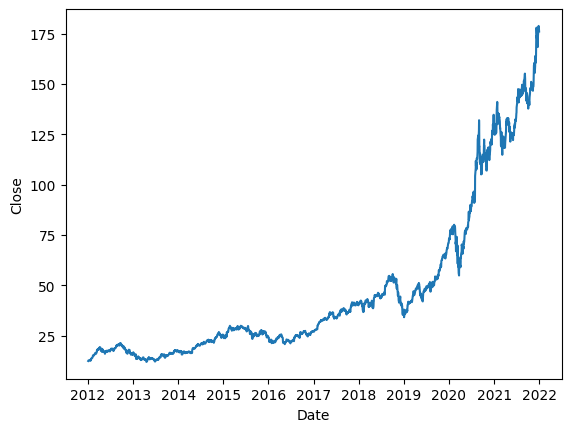

In [72]:
seaborn.lineplot(data_hist["Close"]) #plot the value of close

In [79]:
#first let us fit log(Y) = t + c, with Y value of the stock and t the time and c some constant
data_hist['NumericDate'] = pd.to_numeric(data_hist['Date'])
PF = np.polyfit(data_hist['NumericDate'], np.log(data_hist['Close']), 1)
PF


array([ 7.30673053e-18, -7.26255637e+00])

In [87]:
#use the estimates to calculate the curve
dfTrySomething = data_hist.loc[:,["Close", "NumericDate"]]
dfTrySomething["Estimate"] = np.exp(PF[0]*dfTrySomething["NumericDate"]+PF[1])
dfTrySomething["NoExp"] = dfTrySomething["Close"]/dfTrySomething["Estimate"] ##devide by trend

<Axes: ylabel='NoExp'>

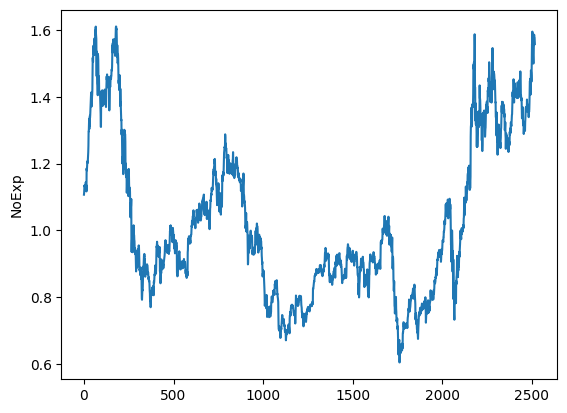

In [97]:
# plot the line with the trend removed
seaborn.lineplot((dfTrySomething.loc[:,"NoExp"]))


<Axes: >

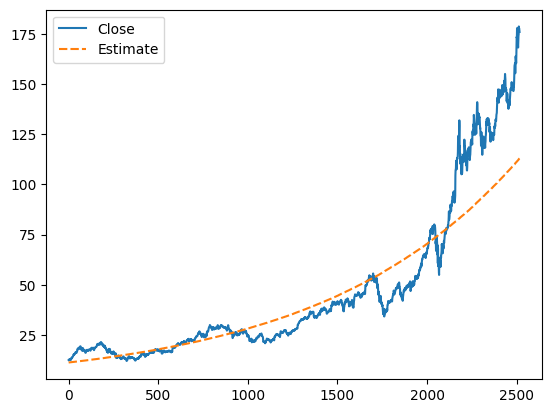

In [96]:
seaborn.lineplot(dfTrySomething.loc[:,["Close","Estimate"]])

In [103]:
features = ['Volume', 'Close', 'Low', 'High']
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(data_hist[features])
test = pd.DataFrame(columns=features, data=feature_transform, index=data_hist.index)


,Volume,Close,Low,High
0,0.178293,0.002719,0.003349,0.001263
1,0.149491,0.003121,0.003400,0.001657
2,0.157168,0.003957,0.004023,0.002355
3,0.189263,0.004753,0.005227,0.003113
4,0.240953,0.004631,0.005619,0.004015
...,...,...,...,...
2512,0.023151,1.000000,0.991235,0.989924
2513,0.026035,0.993817,1.000000,0.995286
2514,0.014571,0.994352,0.997658,0.991161
2515,0.012813,0.987336,0.997358,0.990808
